# PA Housing Price web scraping 

In [77]:
import sys
import os
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Web scraping (https://www.foundmydreamhomewithmarkay.com/)

In [78]:
def get_text_from_elements(elements):

    return [e.text.strip() for e in elements]

In [79]:
# merge records from each page
street_=[]
zip_=[]
price_=[]
bed_=[]
bath_=[]

In [80]:
for i in range(30):
    n=i+1
    url = "https://www.foundmydreamhomewithmarkay.com/listings/areas/46865/pgn/"+str(n)+"/minprice/275000/beds/1/sort/price+asc/?dynkw=Real%20Estate%20Broker%20Pittsburgh%20Pennsylvania/"
    headers = {'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
               'accept-encoding': 'gzip, deflate, sdch, br',
               'accept-language': 'en-GB,en;q=0.8,en-US;q=0.6,ml;q=0.4',
               'cache-control': 'max-age=0',
               'upgrade-insecure-requests': '1',
               'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36'}
    req = requests.get(url,headers=headers)
    soup = BeautifulSoup(req.content,'html.parser')   
    #get each street from soup(1page)
    stree = soup.select(".street")
    street = get_text_from_elements(stree)
    #append street from list street into street_
    for i in range(len(street)):
        s=str(street[i])
        street_.append(s)      
    #get each zip from soup(1page)
    csz = soup.select(".csz")
    city = get_text_from_elements(csz)
    #append zip into list
    zip=[]
    for i in range(len(city)):
        cs = str(city[i]).replace("PITTSBURGH, PA ", "")
        zip.append(cs)
    #append zip from list zip to zip_
    for i in range(len(zip)):
        z=str(zip[i])
        zip_.append(z)       
    #get each price from soup(1page)
    pric = soup.select('h5[class^="price "]')
    price = get_text_from_elements(pric)
    #append price into list
    prices=[]
    for i in range(len(price)):
        pr=str(price[i].replace("$","").replace(",",""))
        prices.append(pr)
    #append price from list price to price_
    for i in range(len(prices)):
        p=str(prices[i])
        price_.append(p)       
    #get each number of bed from soup(1page)
    bds = soup.select(".beds")
    bed = get_text_from_elements(bds)
    #append number of bed into list
    beds = []
    for i in range(len(bed)):
        be = str(bed[i]).replace(" bds", "")
        beds.append(be)
    #append number of beds from list beds to bed_
    for i in range(len(beds)):
        b=str(beds[i])
        bed_.append(b)    
    #get each number of bathroom from soup(1page)
    ba = soup.select(".baths")
    bath = get_text_from_elements(ba)
    #append number of bathroom into list
    baths = []
    for i in range(len(bath)):
        bat = str(bath[i]).replace(" ba", "")
        baths.append(bat)
    #append number of bathroom from list baths into bath_
    for i in range(len(baths)):
        b=str(baths[i])
        bath_.append(b)

# from str to int and float
prices_=[]
for i in range(len(price_)):
    p=int(price_[i])
    prices_.append(p)
beds_=[]
for i in range(len(bed_)):
    b=int(bed_[i])
    beds_.append(b)
baths_=[]
for i in range(len(bath_)):
    b=float(bath_[i])
    baths_.append(b)

    

## Data transformation

In [84]:
import numpy as np

#divide price in to five groups
cut = pd.cut(prices_, 5, precision=2)
#transform list to array
street_ = np.array(street_)
zip_ = np.array(zip_)
prices_ = np.array(prices_)
cut = cut.codes
beds_ = np.array(beds_)
baths_ = np.array(baths_)

In [113]:
#create dataframe of street,zip,price,beds and bathroom
data = np.concatenate([street_[:, np.newaxis],zip_[:, np.newaxis]], axis = 1)
data = np.concatenate([data,prices_[:,np.newaxis]],axis=1)
data = np.concatenate([data, beds_[:,np.newaxis]],axis=1)
data = np.concatenate([data, baths_[:,np.newaxis]],axis=1)
data = np.concatenate([data,cut[:,np.newaxis]],axis=1)
name = ['Street', 'ZIP', 'Price', 'Price Group(differs by 22000)', 'Bed','Bath']
df = pd.DataFrame(data=data, columns =name )
print(df)

                                Street    ZIP   Price  \
0                        130 S 11th St  15203  275000   
1                 5744 Kentucky Ave #2  15232  275000   
2                       2714 Locust Dr  15241  275000   
3                      415 Salem Drive  15243  275000   
4                 144 N Dithridge #811  15213  278000   
5                        420 Neola Cir  15237  278400   
6                     210 Banbury Lane  15220  278500   
7                      2484 HUNTINGTON  15241  279000   
8                  185 1/2 Home Street  15201  279000   
9           401 Forest Highlands Drive  15238  279000   
10                 3500 CALIFORNIA AVE  15212  279900   
11                      450 Oaklawn Dr  15241  279900   
12                    1010 Lakemont Dr  15243  279900   
13                       222 Sheryl Ln  15221  280000   
14                    19 Greenbriar Dr  15220  281900   
15                Lot #22 Cool Springs  15234  281900   
16                    309 N Win

## Histogram (ZIP-PRICE GROUP)

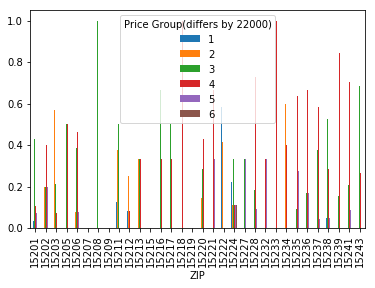

In [114]:
#Histogram of zip and price group
hou_count=pd.crosstab(df['ZIP'],df['Price Group(differs by 22000)'])
hou_count = hou_count.loc[:, :]
pcts = hou_count.div(hou_count.sum(1), axis=0)
pc=pcts.plot.bar()
plt.show(pc)

## Scatter plot matrix (ZIP,PRICE,BED AND BATHROOM)

In [117]:
#create dataframe of zip,price,bed and bathroom
data = np.concatenate([zip_[:, np.newaxis],prices_[:, np.newaxis]], axis = 1)
data = np.concatenate([data, beds_[:,np.newaxis]],axis=1)
data = np.concatenate([data, baths_[:,np.newaxis]],axis=1)

name = ['ZIP', 'Price', 'Bed','Bath']
df = pd.DataFrame(data=data, columns =name )
print(df)

       ZIP   Price Bed Bath
0    15203  275000   4  2.0
1    15232  275000   3  2.0
2    15241  275000   3  2.0
3    15243  275000   3  1.1
4    15213  278000   2  2.1
5    15237  278400   4  2.0
6    15220  278500   2  2.1
7    15241  279000   3  2.1
8    15201  279000   2  2.0
9    15238  279000   3  2.2
10   15212  279900   3  2.1
11   15241  279900   3  2.1
12   15243  279900   3  2.1
13   15221  280000   4  2.1
14   15220  281900   4  2.1
15   15234  281900   2  2.1
16   15224  282500   3  2.1
17   15237  284800   4  2.1
18   15234  284900   2  2.1
19   15234  284900   2  2.1
20   15239  284900   4  2.1
21   15243  285000   3  2.1
22   15202  285000   2  2.0
23   15201  285000   3  1.1
24   15238  285000   3  3.1
25   15228  285000   5  2.1
26   15207  285000   4  2.0
27   15239  285000   4  2.1
28   15215  285000   3  2.1
29   15224  285000   2  1.1
..     ...     ...  ..  ...
270  15241  368900   4  2.2
271  15236  369000   4  3.1
272  15241  369000   4  2.2
273  15203  369000  

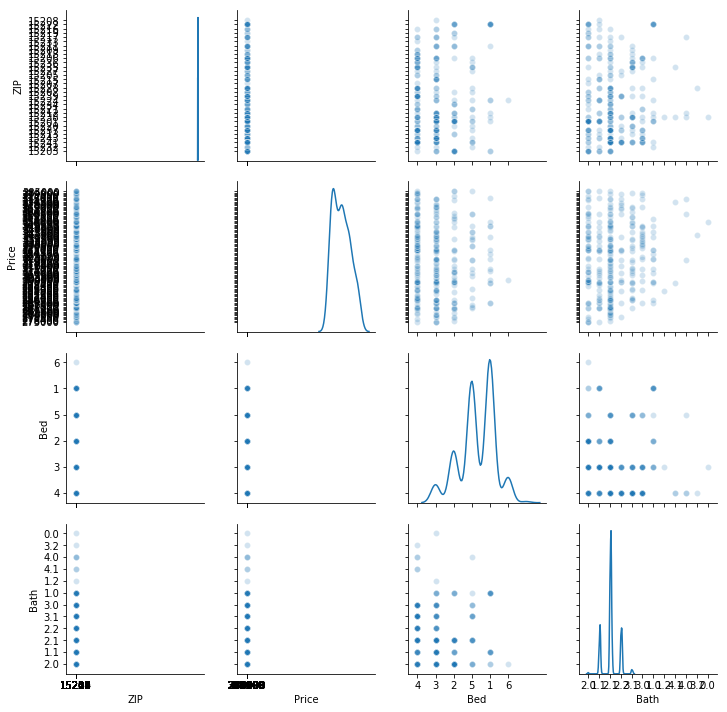

In [120]:
#scatter plot matrix of zip,price,bed and bathroom
sn=sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.2})
plt.show(sn)